# 서포트 벡터 머신

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# 예측/회구 SVM
from sklearn.svm import SVR
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

In [2]:
df_raw = pd.read_csv('/home/pirl/Desktop/Statistics/Big Data Analyze/체질검사.csv', engine='python')
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [3]:
df_raw_y = df_raw['FAT']
df_raw_x = df_raw.drop('FAT', axis=1, inplace=False)

In [4]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.3,
                                                               random_state=123)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (176, 13)
train data Y size : (176,)
test data X size : (76, 13)
test data Y size : (76,)


### Scale 변환 이전

In [5]:
# 모델 생성 : SVR
svm_uncustomized = SVR()
svm_uncustomized.fit(df_train_x, df_train_y)
# train 데이터 설명력
print("Score on training set : {:.3f}".format(svm_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set : {:.3f}".format(svm_uncustomized.score(df_test_x, df_test_y)))

Score on training set : 0.194
Score on test set : 0.003


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [6]:
svm_uncustomized

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

### Scale 변환

In [7]:
# 변수명 지정
v_feature_name = df_train_x.columns
# Scale 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns=v_feature_name)
df_scaled.head()

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,0.088660,6.280963,0.574790,5.444135,4.204531,5.161290,6.684808,5.323774,4.366207,3.841274,4.220708,0.166666,3.402526
1,-1.422033,-0.372455,0.301235,0.044490,-0.929933,-1.250360,-0.755929,-0.401936,-0.993129,0.826247,-1.085611,0.662531,0.612020
2,1.917394,-0.040040,-0.451039,0.291802,0.139747,0.227107,-0.224448,-0.840907,-0.120679,-0.769944,-0.488650,-1.469689,0.612020
3,0.963272,-1.062856,-1.203313,-1.150851,-0.145501,-0.572026,-1.371328,-1.222621,-1.491672,-1.065535,-0.190169,-0.676305,-1.427195
4,0.486211,1.366332,-1.682033,1.322269,2.255336,2.745306,1.803573,0.590521,-0.702312,0.294183,0.804765,0.216252,0.182712


In [9]:
# Scale 변환 데이터 분할
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size=0.3, random_state=123)
print("train data X size : {}".format(df_scaled_train_x.shape))
print("test data X size : {}".format(df_scaled_test_x.shape))

train data X size : (176, 13)
test data X size : (76, 13)


In [10]:
# 기본 모델 생성 : SVR
svm_scaled = SVR()
svm_scaled.fit(df_scaled_train_x, df_train_y)
# train 데이터 설명력
print("Score on training set : {:.3f}".format(svm_scaled.score(df_scaled_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set : {:.3f}".format(svm_scaled.score(df_scaled_test_x, df_test_y)))

Score on training set : 0.553
Score on test set : 0.514


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [11]:
svm_scaled

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
# 모델 Parameter 조정
# train 및 test 설명력 결과 저정
train_score = []
test_score = []
# C : 규제(0.01, 0.1, 1, 10, 100) - 소수점 기준 표시값
para_C = [10 ** c for c in range(-2, 3)]

for v_C in para_C:
    svm = SVR(C = v_C)
    svm.fit(df_scaled_train_x, df_train_y)
    train_score.append(svm.score(df_scaled_train_x, df_train_y))
    test_score.append(svm.score(df_scaled_test_x, df_test_y))
    
# 모델 설명력 저장
df_score_C = pd.DataFrame()
df_score_C['C'] = para_C
df_score_C['TrainScore'] = train_score
df_score_C['TestScore'] = test_score

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/

In [14]:
# 모델 설명력 확인
df_score_C.round(3)

,C,TrainScore,TestScore
0,0.01,0.016,0.017
1,0.10,0.150,0.145
2,1.00,0.553,0.514
3,10.00,0.814,0.705
4,100.00,0.949,0.624


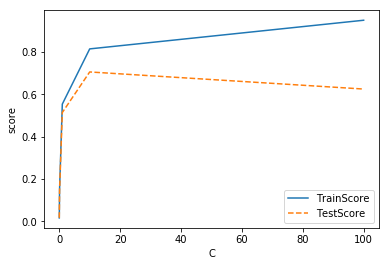

In [15]:
# 모델 설명력 그래프 확인
plt.plot(para_C, train_score, linestyle='-', label='TrainScore')
plt.plot(para_C, test_score, linestyle='--', label='TestScore')
plt.ylabel('score')
plt.xlabel('C')
plt.legend()

In [17]:
# train 및 test 설명력 결과 저정
train_score = []
test_score = []
# gamma : 규제(0.01, 0.1, 1, 10, 100)
para_gamma = [10 ** gamma for gamma in range(-2, 3)]

for v_gamma in para_gamma:
    svm = SVR(gamma = v_gamma, C = 10)
    svm.fit(df_scaled_train_x, df_train_y)
    train_score.append(svm.score(df_scaled_train_x, df_train_y))
    test_score.append(svm.score(df_scaled_test_x, df_test_y))
    
# 모델 설명력 저장
df_score_gamma = pd.DataFrame()
df_score_gamma['gamma'] = para_gamma
df_score_gamma['TrainScore'] = train_score
df_score_gamma['TestScore'] = test_score

In [18]:
# 모델 설명력 확인
df_score_gamma.round(3)

,gamma,TrainScore,TestScore
0,0.01,0.696,0.732
1,0.10,0.840,0.684
2,1.00,0.959,0.173
3,10.00,0.946,-0.001
4,100.00,0.946,-0.001


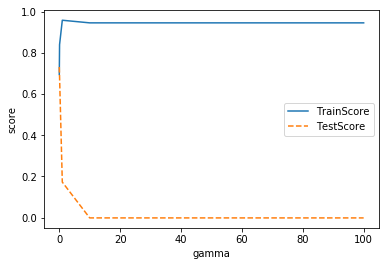

In [19]:
# 모델 설명력 그래프 확인
plt.plot(para_gamma, train_score, linestyle='-', label='TrainScore')
plt.plot(para_gamma, test_score, linestyle='--', label='TestScore')
plt.ylabel('score')
plt.xlabel('gamma')
plt.legend()

In [36]:
train_score = []
test_score = []
# epsilon : 규제(0.01 ~ 1)
para_epsilon = [eps/20 for eps in range(1, 21)]

for v_epsilon in para_epsilon:
    svm = SVR(epsilon=v_epsilon, C = 10, gamma = 0.03)
    svm.fit(df_scaled_train_x, df_train_y)
    train_score.append(svm.score(df_scaled_train_x, df_train_y))
    test_score.append(svm.score(df_scaled_test_x, df_test_y))
    
# 모델 설명력 저장
df_score_epsilon = pd.DataFrame()
df_score_epsilon['epsilon'] = para_epsilon
df_score_epsilon['TrainScore'] = train_score
df_score_epsilon['TestScore'] = test_score

In [37]:
df_score_epsilon.round(3)

,epsilon,TrainScore,TestScore
0,0.05,0.743,0.741
1,0.10,0.743,0.740
2,0.15,0.744,0.740
3,0.20,0.744,0.739
4,0.25,0.744,0.738
5,0.30,0.745,0.739
6,0.35,0.746,0.741
7,0.40,0.746,0.741
8,0.45,0.747,0.742
9,0.50,0.747,0.742


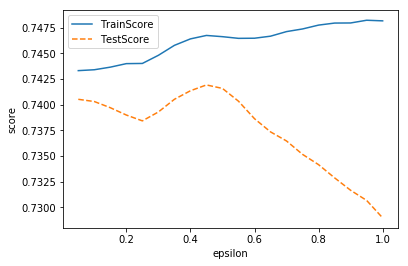

In [38]:
# 모델 설명력 그래프 확인
plt.plot(para_epsilon, train_score, linestyle='-', label='TrainScore')
plt.plot(para_epsilon, test_score, linestyle='--', label='TestScore')
plt.ylabel('score')
plt.xlabel('epsilon')
plt.legend()

In [39]:
svr_final = SVR(C=10, gamma=0.03, epsilon=0.5)
svr_final.fit(df_scaled_train_x, df_train_y)

# train 데이터 설명력
print("Score on training set : {:.3f}".format(svr_final.score(df_scaled_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set : {:.3f}".format(svr_final.score(df_scaled_test_x, df_test_y)))

Score on training set : 0.747
Score on test set : 0.742


## 실습

In [74]:
df_diabetes = pd.read_csv('/home/pirl/Desktop/Statistics/Big Data Analyze/DIABETES.csv', engine='python')
df_diabetes.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [75]:
df_diabetes_y = df_diabetes['Y']
df_diabetes_x = df_diabetes.drop('Y', axis=1, inplace=False)

In [191]:
dfd_train_x, dfd_test_x, dfd_train_y, dfd_test_y = train_test_split(df_diabetes_x, df_diabetes_y, test_size=0.3,
                                                               random_state=82)
print("train data X size : {}".format(dfd_train_x.shape))
print("train data Y size : {}".format(dfd_train_y.shape))
print("test data X size : {}".format(dfd_test_x.shape))
print("test data Y size : {}".format(dfd_test_y.shape))

train data X size : (309, 10)
train data Y size : (309,)
test data X size : (133, 10)
test data Y size : (133,)


In [192]:
# 모델 생성 : SVR
svm_uncustomized = SVR()
svm_uncustomized.fit(dfd_train_x, dfd_train_y)
# train 데이터 설명력
print("Score on training set : {:.3f}".format(svm_uncustomized.score(dfd_train_x, dfd_train_y)))
# test 데이터 설명력
print("Score on test set : {:.3f}".format(svm_uncustomized.score(dfd_test_x, dfd_test_y)))

Score on training set : -0.008
Score on test set : -0.049


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [85]:
# 변수명 지정
v_feature_name = dfd_train_x.drop('GENDER', axis=1, inplace=False).columns
# Scale 적용
scaler = StandardScaler()
dfd_scaled = scaler.fit_transform(df_diabetes_x.drop('GENDER', axis=1, inplace=False))
dfd_scaled = pd.DataFrame(dfd_scaled, columns=v_feature_name)
dfd_scaled = pd.concat([dfd_scaled, df_diabetes['GENDER']], axis=1)
dfd_scaled.head()

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,AGE,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE,GENDER
0,0.800500,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989,2
1,-0.039567,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479,1
2,1.793307,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154,2
3,-1.872441,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823,1
4,0.113172,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568,1


In [217]:
# Scale 변환 데이터 분할
dfd_scaled_train_x, dfd_scaled_test_x = train_test_split(dfd_scaled, test_size=0.3, random_state=82)
print("train data X size : {}".format(dfd_scaled_train_x.shape))
print("test data X size : {}".format(dfd_scaled_test_x.shape))

train data X size : (309, 10)
test data X size : (133, 10)


In [218]:
# 기본 모델 생성 : SVR
svm_scaled = SVR()
svm_scaled.fit(dfd_scaled_train_x, dfd_train_y)
# train 데이터 설명력
print("Score on training set : {:.3f}".format(svm_scaled.score(dfd_scaled_train_x, dfd_train_y)))
# test 데이터 설명력
print("Score on test set : {:.3f}".format(svm_scaled.score(dfd_scaled_test_x, dfd_test_y)))

Score on training set : 0.164
Score on test set : 0.144


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [195]:
# 모델 Parameter 조정
# train 및 test 설명력 결과 저정
train_score = []
test_score = []
# C : 규제(0.01, 0.1, 1, 10, 100) - 소수점 기준 표시값
para_C = [10 ** c for c in range(-2, 3)]

for v_C in para_C:
    svm = SVR(C = v_C)
    svm.fit(dfd_scaled_train_x, dfd_train_y)
    train_score.append(svm.score(dfd_scaled_train_x, dfd_train_y))
    test_score.append(svm.score(dfd_scaled_test_x, dfd_test_y))
    
# 모델 설명력 저장
df_score_C = pd.DataFrame()
df_score_C['C'] = para_C
df_score_C['TrainScore'] = train_score
df_score_C['TestScore'] = test_score

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/

In [196]:
df_score_C.round(3)

,C,TrainScore,TestScore
0,0.01,-0.027,-0.047
1,0.10,-0.007,-0.028
2,1.00,0.164,0.144
3,10.00,0.559,0.425
4,100.00,0.713,0.313


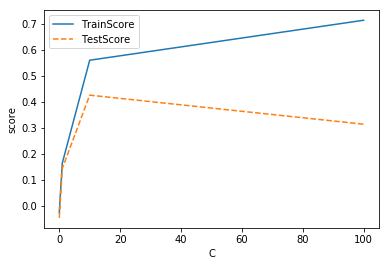

In [197]:
# 모델 설명력 그래프 확인
plt.plot(para_C, train_score, linestyle='-', label='TrainScore')
plt.plot(para_C, test_score, linestyle='--', label='TestScore')
plt.ylabel('score')
plt.xlabel('C')
plt.legend()

In [204]:
# train 및 test 설명력 결과 저정
train_score = []
test_score = []
# gamma : 규제(0.01, 0.1, 1, 10, 100)
para_gamma = [10 ** gamma for gamma in range(-2, 3)]

for v_gamma in para_gamma:
    svm = SVR(gamma = v_gamma, C = 11)
    svm.fit(dfd_scaled_train_x, dfd_train_y)
    train_score.append(svm.score(dfd_scaled_train_x, dfd_train_y))
    test_score.append(svm.score(dfd_scaled_test_x, dfd_test_y))
    
# 모델 설명력 저장
df_score_gamma = pd.DataFrame()
df_score_gamma['gamma'] = para_gamma
df_score_gamma['TrainScore'] = train_score
df_score_gamma['TestScore'] = test_score

In [205]:
df_score_gamma.round(3)

,gamma,TrainScore,TestScore
0,0.01,0.454,0.437
1,0.10,0.564,0.424
2,1.00,0.222,-0.001
3,10.00,0.181,-0.055
4,100.00,0.182,-0.055


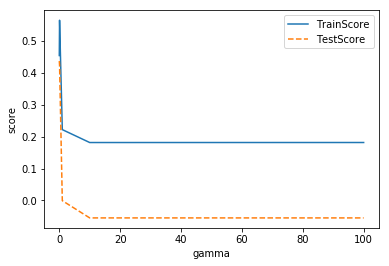

In [206]:
# 모델 설명력 그래프 확인
plt.plot(para_gamma, train_score, linestyle='-', label='TrainScore')
plt.plot(para_gamma, test_score, linestyle='--', label='TestScore')
plt.ylabel('score')
plt.xlabel('gamma')
plt.legend()

In [207]:
train_score = []
test_score = []
# epsilon : 규제(0.01 ~ 1)
para_epsilon = [eps/20 for eps in range(1, 21)]

for v_epsilon in para_epsilon:
    svm = SVR(epsilon=v_epsilon, C = 11, gamma = 0.01)
    svm.fit(dfd_scaled_train_x, dfd_train_y)
    train_score.append(svm.score(dfd_scaled_train_x, dfd_train_y))
    test_score.append(svm.score(dfd_scaled_test_x, dfd_test_y))
    
# 모델 설명력 저장
df_score_epsilon = pd.DataFrame()
df_score_epsilon['epsilon'] = para_epsilon
df_score_epsilon['TrainScore'] = train_score
df_score_epsilon['TestScore'] = test_score

In [208]:
df_score_epsilon.round(3)

,epsilon,TrainScore,TestScore
0,0.05,0.454,0.436
1,0.10,0.454,0.437
2,0.15,0.454,0.437
3,0.20,0.454,0.437
4,0.25,0.454,0.437
5,0.30,0.454,0.437
6,0.35,0.454,0.437
7,0.40,0.454,0.437
8,0.45,0.454,0.437
9,0.50,0.455,0.437


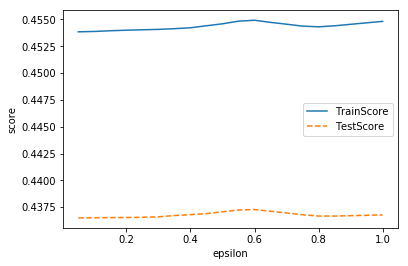

In [209]:
# 모델 설명력 그래프 확인
plt.plot(para_epsilon, train_score, linestyle='-', label='TrainScore')
plt.plot(para_epsilon, test_score, linestyle='--', label='TestScore')
plt.ylabel('score')
plt.xlabel('epsilon')
plt.legend()

In [210]:
svr_final = SVR(C=11, gamma=0.01, epsilon=0.6)
svr_final.fit(dfd_scaled_train_x, dfd_train_y)

# train 데이터 설명력
print("Score on training set : {:.3f}".format(svr_final.score(dfd_scaled_train_x, dfd_train_y)))
# test 데이터 설명력
print("Score on test set : {:.3f}".format(svr_final.score(dfd_scaled_test_x, dfd_test_y)))

Score on training set : 0.455
Score on test set : 0.437
